In [2]:
import pandas as pd

auto = pd.read_csv("../../data/Auto.csv", na_values='?').dropna().set_index("name")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [3]:
from ISLP.models import ModelSpec as MS 
from sklearn.svm import SVC
import sklearn.model_selection as skm

median_mpg = auto['mpg'].median()
auto['high_mpg'] = (auto['mpg'] > median_mpg).astype(int)

X = MS(['weight', 'year']).fit_transform(auto)
y = auto['high_mpg']

kfold = skm.KFold(5, random_state=0, shuffle=True)
cvs = []
C = [0.01, 0.1, 0.3, 0.5, 1, 2]
misclassified = []

for c in C:
    svm = SVC(C=c, kernel='linear')
    
    scores = skm.cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')
    cvs.append(scores.mean())
    
    svm.fit(X, y)
    y_pred = svm.predict(X)
    n_mis = (y_pred != y).sum()
    misclassified.append(n_mis)

for c_val, n_mis, cv_acc in zip(C, misclassified, cvs):
    print(f"C={c_val}: misclassified={n_mis}, CV accuracy={cv_acc:.3f}")


C=0.01: misclassified=36, CV accuracy=0.901
C=0.1: misclassified=37, CV accuracy=0.901
C=0.3: misclassified=37, CV accuracy=0.901
C=0.5: misclassified=37, CV accuracy=0.901
C=1: misclassified=37, CV accuracy=0.901
C=2: misclassified=37, CV accuracy=0.901


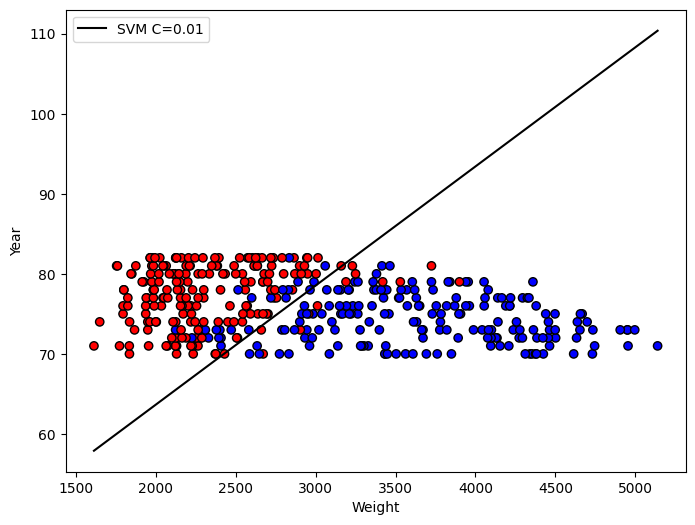

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

X_raw = auto[['weight', 'year']].values
y = auto['high_mpg'].values

svm = SVC(C=0.01, kernel='linear')
svm.fit(X_raw, y)

w = svm.coef_[0]
b = svm.intercept_[0]
x_plot = np.linspace(X_raw[:, 0].min(), X_raw[:, 0].max(), 100)
y_plot = -(w[0]*x_plot + b)/w[1]

plt.figure(figsize=(8,6))
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(X_raw[:, 0], X_raw[:, 1], c=colors, edgecolor='k')
plt.plot(x_plot, y_plot, 'k-', label='SVM C=0.01')
plt.xlabel('Weight')
plt.ylabel('Year')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import accuracy_score

svm_r = SVC(kernel='rbf')

kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_r,
                        {'gamma':np.linspace(0.01, 1, 10),
                         'C':np.linspace(0.01, 1, 10)},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
params = grid.best_params_

best_r = grid.best_estimator_
cv_error = 1 - np.mean(skm.cross_val_score(best_r, X, y, cv=5))

y_pred_train = best_r.predict(X)
train_error = 1 - accuracy_score(y, y_pred_train)


print("Optimal params:", params)
print("CV error:", cv_error)
print("Training error:", train_error)

Optimal params: {'C': np.float64(1.0), 'gamma': np.float64(0.01)}
CV error: 0.15835767607919515
Training error: 0.04846938775510201


In [17]:
svm_p = SVC(kernel='poly')

kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_p,
                        {'degree': range(1, 11)},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
params = grid.best_params_

best_p = grid.best_estimator_
cv_error = 1 - np.mean(skm.cross_val_score(svm_p, X, y, cv=5))

y_pred_train = best_p.predict(X)
train_error = 1 - accuracy_score(y, y_pred_train)

print("Optimal params:", params)
print("CV error:", cv_error)
print("Training error:", train_error)

Optimal params: {'degree': 1}
CV error: 0.12518662771827338
Training error: 0.11989795918367352
